___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<head>
    <center><title>~ Pandas Datenrahmen | Lektion-3 ~</title></center>
</head>

# Fehlende Werte und Ausreißer

## Umgang | Handhabung mit fehlenden Werten

In [476]:
import numpy as np
import pandas as pd
import seaborn as sns

In [477]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", np.nan, "FS", "FS", np.nan, "DS","AWS"]
dept_ = [1, "FS", None, "AWS", 5.2, np.nan, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, np.nan, 136, 60, 125, np.nan])
df = pd.DataFrame({"id": id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "dept_": dept_,
                   "var1": V1,
                   "var2": V2,
                   "salary": salary})
df

,id,gender,status,dept,dept_,var1,var2,salary
0,P001,M,FT,DS,1,2,8.0,NaN
1,P002,F,PT,FS,FS,3,NaN,54.0
2,P003,M,-,AWS,None,5,5.0,59.0
3,P004,F,FT,AWS,AWS,nan,8.0,120.0
4,P005,M,PT,DS,5.2,7,11.0,58.0
5,P006,F,PT,NaN,NaN,1,NaN,75.0
6,P007,M,FT,FS,FS,nan,NaN,NaN
7,P008,F,-,FS,FS,10,2.0,136.0
8,P009,M,PT,NaN,NaN,14,3.0,60.0
9,P010,F,FT,DS,DS,-,7.0,125.0


###  NaN - "Not a Number"

#### ``str`` type and ``nan`` type zusammen in einer Liste:

In [478]:
dept_[0:5], type(dept[0]), type(dept[1]), type(dept[2]), type(dept[3]), type(dept[4]), type(dept[5]) 

([1, 'FS', None, 'AWS', 5.2], str, str, str, str, str, float)

In [479]:
df["dept_"].value_counts(dropna=False)

FS     3
NaN    3
AWS    2
1      1
5.2    1
DS     1
Name: dept_, dtype: int64

In [480]:
df["dept_"].value_counts()

FS     3
AWS    2
1      1
5.2    1
DS     1
Name: dept_, dtype: int64

In [481]:
df["dept_"].isnull().sum()

3

#### ``str`` type and ``nan`` type zusammen in einem Array:

##### V1

In [482]:
V1, type(V1[1]), type(V1[3]), type(V1[6]) 

(array(['2', '3', '5', 'nan', '7', '1', 'nan', '10', '14', '-', '6'],
       dtype='<U32'),
 numpy.str_,
 numpy.str_,
 numpy.str_)

In [483]:
df["var1"].value_counts(dropna=False)

nan    2
2      1
3      1
5      1
7      1
1      1
10     1
14     1
-      1
6      1
Name: var1, dtype: int64

In [484]:
df["var1"].value_counts()

nan    2
2      1
3      1
5      1
7      1
1      1
10     1
14     1
-      1
6      1
Name: var1, dtype: int64

In [485]:
df["var1"].isnull().sum()

0

##### V2

In [486]:
V2, type(V2[1]), type(V2[3]), type(V2[6])

(array([ 8., nan,  5.,  8., 11., nan, nan,  2.,  3.,  7.,  9.]),
 numpy.float64,
 numpy.float64,
 numpy.float64)

In [487]:
df["var2"].value_counts(dropna=False)

NaN     3
8.0     2
5.0     1
11.0    1
2.0     1
3.0     1
7.0     1
9.0     1
Name: var2, dtype: int64

In [488]:
df["var2"].value_counts()

8.0     2
5.0     1
11.0    1
2.0     1
3.0     1
7.0     1
9.0     1
Name: var2, dtype: int64

In [489]:
df["var2"].isnull().sum()

3

In [490]:
salary, type(salary[1]), type(salary[3]), type(salary[6])

(array([ nan,  54.,  59., 120.,  58.,  75.,  nan, 136.,  60., 125.,  nan]),
 numpy.float64,
 numpy.float64,
 numpy.float64)

In [491]:
df["salary"].value_counts(dropna=False)

NaN      3
54.0     1
59.0     1
120.0    1
58.0     1
75.0     1
136.0    1
60.0     1
125.0    1
Name: salary, dtype: int64

In [492]:
df["salary"].value_counts()

54.0     1
59.0     1
120.0    1
58.0     1
75.0     1
136.0    1
60.0     1
125.0    1
Name: salary, dtype: int64

In [493]:
df["salary"].isnull().sum()

3

#### Object Type

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   dept_   8 non-null      object 
 5   var1    11 non-null     object 
 6   var2    8 non-null      float64
 7   salary  8 non-null      float64
dtypes: float64(2), object(6)
memory usage: 832.0+ bytes


In [495]:
df["dept_"]

0        1
1       FS
2     None
3      AWS
4      5.2
5      NaN
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept_, dtype: object

In [496]:
type(df["dept_"][0]), type(df["dept_"][1]), type(df["dept_"][2]), type(df["dept_"][3]), type(df["dept_"][5])

(int, str, NoneType, str, float)

In [497]:
df["var1"]

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [498]:
type(df["var1"][0]), type(df["var1"][3]), type(df["var1"][9])

(str, str, str)

In [499]:
df["var2"]

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [500]:
type(df["var2"][0]), type(df["var2"][1]), type(df["var2"][3])

(numpy.float64, numpy.float64, numpy.float64)

In [501]:
df["salary"]

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [502]:
type(df["salary"][0]), type(df["salary"][1]), type(df["salary"][3])

(numpy.float64, numpy.float64, numpy.float64)

In [503]:
df = df.drop("dept_", axis=1)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


## Type of NaN Werten

In [504]:
df.select_dtypes(include=object).T

,0,1,2,3,4,5,6,7,8,9,10
id,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,P011
gender,M,F,M,F,M,F,M,F,M,F,M
status,FT,PT,-,FT,PT,PT,FT,-,PT,FT,NaN
dept,DS,FS,AWS,AWS,DS,NaN,FS,FS,NaN,DS,AWS
var1,2,3,5,nan,7,1,nan,10,14,-,6


In [505]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,11,11,P001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,11,2,M,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,10,3,FT,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dept,9,3,DS,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var1,11,10,nan,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var2,8.0,NaN,NaN,NaN,6.625,3.067689,2.0,4.5,7.5,8.25,11.0
salary,8.0,NaN,NaN,NaN,85.875,34.868887,54.0,58.75,67.5,121.25,136.0


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      float64
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


In [507]:
type(np.nan)

float

In [508]:
type(np.NaN)

float

In [509]:
type(None)

NoneType

## Fehlende Werte erkennen

- NaN steht für "not a number" und ist ein numerischer Datentyp, der zur Darstellung von undefinierten oder nicht darstellbaren Werten verwendet wird.

- Beispielsweise ist 0/0 als reelle Zahl undefiniert und wird daher durch NaN dargestellt. Die Quadratwurzel einer negativen Zahl ist eine imaginäre Zahl, die nicht als reelle Zahl dargestellt werden kann, also wird sie durch NaN dargestellt.

- NaN wird in einer Berechnung auch Variablen zugewiesen, die keine Werte haben und noch berechnet werden müssen.

In [510]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [511]:
df.isnull()
#df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [512]:
df.notnull()
#df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [513]:
# Spalten/Variablen mit fehlenden Werten:
df.isnull().any()

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [514]:
# Zeilen mit fehlenden Werten:
df.isnull().any(axis=1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [515]:
df[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
8,P009,M,PT,NaN,14,3.0,60.0
10,P011,M,NaN,AWS,6,9.0,NaN


In [516]:
# Zeilen mit allen notnull-Werten mit '~'
df[~df.isnull().any(axis = 1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
7,P008,F,-,FS,10,2.0,136.0
9,P010,F,FT,DS,-,7.0,125.0


In [517]:
df[df.notnull().all(axis = 1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
7,P008,F,-,FS,10,2.0,136.0
9,P010,F,FT,DS,-,7.0,125.0


In [518]:
# Spalten, deren alle Werte sind Null:
df.isnull().all()

id        False
gender    False
status    False
dept      False
var1      False
var2      False
salary    False
dtype: bool

In [519]:
# Zeilen, deren alle Werte sind Null:
df.isnull().all(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [520]:
# Spalten abrufen, deren alle Werte null sind:
df[df.isnull().all(axis=1)]

,id,gender,status,dept,var1,var2,salary


In [521]:
# Anzahl fehlender Werte in den Spalten:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [522]:
# Anzahl fehlender Werte im gesamten Datenrahmen:
df.isnull().sum().sum()

9

In [523]:
df.salary.isnull()

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [524]:
df.salary.isnull().any()

True

In [525]:
df.salary.isnull().sum()

3

In [526]:
# Prozentsatz von Nullwerten nach Spalten
round(df.isnull().sum()/len(df)*100, 2)

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

## Konvertieren unangemessener Werte in NaN-Werte

- map()
- replace()

In [527]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [528]:
df["var1"].map({"-":np.nan})

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [529]:
df["var1"].replace(to_replace="-", value=np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [530]:
df["var1"].replace(to_replace="-", value=np.nan).isnull().sum()

1

In [531]:
df["var1"].replace("-", np.nan).astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [532]:
df["var1"].isnull().sum()

0

In [533]:
df["var1"]

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [534]:
type(df["var1"][3]), type(df["var1"][6]), type(df["var1"][9])

(str, str, str)

In [535]:
df['var1']

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [536]:
df["var1"].replace("-", np.nan).astype("float").isnull().sum()  
# Diese String-Nans warteten als passive Nan, sie kehrten zu ihrer Essenz zurück, wenn sie Float eingaben

3

In [537]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [538]:
df["var1"] = df["var1"].replace("-", np.nan).astype("float")

In [539]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [540]:
df["var1"].value_counts(dropna=False)

NaN     3
2.0     1
3.0     1
5.0     1
7.0     1
1.0     1
10.0    1
14.0    1
6.0     1
Name: var1, dtype: int64

In [541]:
df["status"], type(df["status"][0]), type(df["status"][2]), type(df["status"][7]), type(df["status"][10])

(0      FT
 1      PT
 2       -
 3      FT
 4      PT
 5      PT
 6      FT
 7       -
 8      PT
 9      FT
 10    NaN
 Name: status, dtype: object,
 str,
 str,
 str,
 float)

In [542]:
df["status"] = df["status"].replace("-", np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [543]:
df["status"], type(df["status"][0]), type(df["status"][2]), type(df["status"][10])

(0      FT
 1      PT
 2     NaN
 3      FT
 4      PT
 5      PT
 6      FT
 7     NaN
 8      PT
 9      FT
 10    NaN
 Name: status, dtype: object,
 str,
 float,
 float)

In [544]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [545]:
df.isnull().sum()

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

In [546]:
df.isnull().sum().sum()
# Jetz haben wir 15 NaN-Werte aber echte float NaNs

14

In [547]:
df["id"].value_counts()

P001    1
P002    1
P003    1
P004    1
P005    1
P006    1
P007    1
P008    1
P009    1
P010    1
P011    1
Name: id, dtype: int64

In [548]:
df["gender"].value_counts()

M    6
F    5
Name: gender, dtype: int64

In [549]:
df["status"].value_counts()

FT    4
PT    4
Name: status, dtype: int64

In [550]:
df["dept"].value_counts()

DS     3
FS     3
AWS    3
Name: dept, dtype: int64

In [551]:
df["var1"].value_counts()

2.0     1
3.0     1
5.0     1
7.0     1
1.0     1
10.0    1
14.0    1
6.0     1
Name: var1, dtype: int64

In [552]:
df["var2"].value_counts()

8.0     2
5.0     1
11.0    1
2.0     1
3.0     1
7.0     1
9.0     1
Name: var2, dtype: int64

In [553]:
df["salary"].value_counts()

54.0     1
59.0     1
120.0    1
58.0     1
75.0     1
136.0    1
60.0     1
125.0    1
Name: salary, dtype: int64

## Umgangmethoden von fehlenden Werten
- Löschen von Zeilen: Wenn mehr als 70-75 % fehlende Werte vorhanden sind

- Ersetzen durch Mittelwert/Medianwert/Modus (Imputation): Diese können auf ein Merkmal mit numerischen Daten angewendet werden.

- Zuweisen einer eindeutigen Kategorie: Wenn ein kategoriales Merkmal eine bestimmte Anzahl von Klassen hat, können wir eine andere Klasse zuweisen.

- Vorhersagen der fehlenden Werte: Wir können die Nullen mit Hilfe eines maschinellen Lernalgorithmen, bespielweise wie der linearen Regression.

- Verwenden von Algorithmen, die fehlende Werte unterstützen: KNN ist ein maschineller Lernalgorithmen, der nach dem Prinzip der Entfernungsmessung arbeitet. Dieser Algorithmus kann verwendet werden, wenn im Datensatz Nullen vorhanden sind. KNN berücksichtigt die fehlenden Werte, indem es die Mehrheit der K nächsten Werte nimmt

 ### Dropping (Fallenlassen)
 
 - dropna()
 - drop()

### ``dropna()``

In [554]:
# Es entfernt die Zeilen, die einen (mindestens einen) fehlenden Wert enthalten.
df.dropna(axis=0, how="any", thresh=None, inplace=False)
# how : {'any','all'}, der Standard 'any', 
# thresh : Erfordert so viele Nicht-NA-Werte.

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58.0


In [555]:
# Es entfernt die Spalten, die einen (mindestens einen fehlenden Wert) fehlenden Wert enthalten
df.dropna(axis=1, how="any", thresh=None, inplace=False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [556]:
df.dropna(axis=1, how="all", thresh=None, inplace=False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [557]:
# Lassen Sie uns eine Spalte erstellen, die voller fehlender Werte ist.
df["NaNs"] = np.nan
df

,id,gender,status,dept,var1,var2,salary,NaNs
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,NaN,1.0,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN


In [558]:
# Lassen Sie uns jetzt die Spalte löschen, die voller fehlender Werte ist.
df.dropna(axis=1, how="all", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [559]:
df.dropna(axis=1, how="any", thresh=9, inplace=False)

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,NaN
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


### ``drop()``

In [560]:
df.drop(index=[1, 3, 5], axis=0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0
4,P005,M,PT,DS,7.0,11.0,58.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [561]:
df.drop(columns=["id", "var1"], axis=1)

,gender,status,dept,var2,salary
0,M,FT,DS,8.0,NaN
1,F,PT,FS,NaN,54.0
2,M,NaN,AWS,5.0,59.0
3,F,FT,AWS,8.0,120.0
4,M,PT,DS,11.0,58.0
5,F,PT,NaN,NaN,75.0
6,M,FT,FS,NaN,NaN
7,F,NaN,FS,2.0,136.0
8,M,PT,NaN,3.0,60.0
9,F,FT,DS,7.0,125.0


 ### Filling


In [562]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


#### Füllen mit einem bestimmten Wert

In [563]:
df.fillna("00000")

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,00000
1,P002,F,PT,FS,3.0,00000,54.0
2,P003,M,00000,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,00000,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,00000,1.0,00000,75.0
6,P007,M,FT,FS,00000,00000,00000
7,P008,F,00000,FS,10.0,2.0,136.0
8,P009,M,PT,00000,14.0,3.0,60.0
9,P010,F,FT,DS,00000,7.0,125.0


In [564]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [565]:
df["var1"].fillna("00000")

0       2.0
1       3.0
2       5.0
3     00000
4       7.0
5       1.0
6     00000
7      10.0
8      14.0
9     00000
10      6.0
Name: var1, dtype: object

#### Füllen mit einem beliebigen richtigen Wert

#### ``mean`` ``median``

In [566]:
df["var1"].mean()

6.0

In [567]:
df["var1"].fillna(df["var1"].mean()*1000)

0        2.0
1        3.0
2        5.0
3     6000.0
4        7.0
5        1.0
6     6000.0
7       10.0
8       14.0
9     6000.0
10       6.0
Name: var1, dtype: float64

In [568]:
df["var1"].median()

5.5

In [569]:
df["var1"].fillna(df["var1"].median()*1000)

0        2.0
1        3.0
2        5.0
3     5500.0
4        7.0
5        1.0
6     5500.0
7       10.0
8       14.0
9     5500.0
10       6.0
Name: var1, dtype: float64

In [570]:
df.mean()

C:\Users\bulen\AppData\Local\Temp/ipykernel_23084/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [571]:
df.fillna(df.mean()*1000)

C:\Users\bulen\AppData\Local\Temp/ipykernel_23084/730498975.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean()*1000)


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,85875.0
1,P002,F,PT,FS,3.0,6625.0,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6000.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,6625.0,75.0
6,P007,M,FT,FS,6000.0,6625.0,85875.0
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,6000.0,7.0,125.0


In [572]:
df.fillna({"dept":"other", "var1":df.var1.mean()*1000, "var2":df.var2.median()*1000})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7500.0,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6000.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,other,1.0,7500.0,75.0
6,P007,M,FT,FS,6000.0,7500.0,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,other,14.0,3.0,60.0
9,P010,F,FT,DS,6000.0,7.0,125.0


In [573]:
df.mean()[["var1","var2"]]

C:\Users\bulen\AppData\Local\Temp/ipykernel_23084/2456245347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()[["var1","var2"]]


var1    6.000
var2    6.625
dtype: float64

In [574]:
df.fillna(df.mean()[["var1","var2"]]*1000)

C:\Users\bulen\AppData\Local\Temp/ipykernel_23084/599779694.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean()[["var1","var2"]]*1000)


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6625.0,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6000.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,6625.0,75.0
6,P007,M,FT,FS,6000.0,6625.0,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,6000.0,7.0,125.0


In [575]:
pd.notna(df)

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [576]:
df.where(cond=pd.notna(df), other=df.mean()*1000, axis=1)
# df.where(pd.notna(df), df.mean(), axis = "columns")  # positionell

C:\Users\bulen\AppData\Local\Temp/ipykernel_23084/789757219.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond=pd.notna(df), other=df.mean()*1000, axis=1)


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,85875.0
1,P002,F,PT,FS,3.0,6625.0,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6000.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,6625.0,75.0
6,P007,M,FT,FS,6000.0,6625.0,85875.0
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,6000.0,7.0,125.0


#### ``interpolate``

In [577]:
df.interpolate() # Füllen Sie NaN-Werte mithilfe einer Interpolationsmethode.

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,8.0,75.0
6,P007,M,FT,FS,5.5,5.0,105.5
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


In [578]:
# df.interpolate(axis=1) 
# TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.

#### Auffüllen der fehlenden Werte kategorialer Variablen

#### ``mode``

In [579]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [580]:
df["dept"]

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     NaN
6      FS
7      FS
8     NaN
9      DS
10    AWS
Name: dept, dtype: object

In [581]:
df["dept"].isnull().sum()

2

In [582]:
df["dept"].mode()

0    AWS
1     DS
2     FS
dtype: object

In [583]:
df["dept"].mode()[0]

'AWS'

In [584]:
df["dept"].fillna(df["dept"].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [585]:
df["dept"].fillna(df["dept"].mode()[0]).isnull().sum()

0

#### ``bfill`` ``ffill``

In [586]:
df["dept"].fillna(method="bfill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [587]:
df["status"].fillna(method = "ffill")

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

 #### Füllen nach Bedingung und nach Gruppe der kategorialen Variablen

In [588]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


#### ``dept``

In [589]:
df["dept"].fillna(method="ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


#### ``salary``
- Achten Sie auf ``loc`` und ``inplace``!!!

In [590]:
df.loc[df["salary"]>=100, "status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [591]:
df.loc[df["salary"]<100, "status"]

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [592]:
df[df["salary"]>=100]["status"].mode()[0]

'FT'

In [593]:
df[df["salary"]>=100]["status"] = df[df["salary"]>=100]["status"].fillna(df[df["salary"]>=100]["status"].mode()[0])
df

C:\Users\bulen\AppData\Local\Temp/ipykernel_23084/267043330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["salary"]>=100]["status"] = df[df["salary"]>=100]["status"].fillna(df[df["salary"]>=100]["status"].mode()[0])


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [594]:
df[df["salary"]>=100]["status"] = df[df["salary"]<100]["status"].fillna(df[df["salary"]<100]["status"].mode()[0])
df

C:\Users\bulen\AppData\Local\Temp/ipykernel_23084/49060513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["salary"]>=100]["status"] = df[df["salary"]<100]["status"].fillna(df[df["salary"]<100]["status"].mode()[0])


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [595]:
df.loc[df["salary"]<100, "status"].mode()[0]

'PT'

In [596]:
df1 = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df2 = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df1, df2

(3    FT
 7    FT
 9    FT
 Name: status, dtype: object,
 1    PT
 2    PT
 4    PT
 5    PT
 8    PT
 Name: status, dtype: object)

In [597]:
df[df["salary"]>=100]["status"].fillna(df[df["salary"]>=100]["status"].mode()[0], inplace=True)

C:\Users\bulen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [598]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df    

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [599]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [600]:
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


``.apply(lambda x : x.mode()[0])``

In [601]:
df.groupby(["gender", "dept"])[["status"]].describe()

status                
             count unique top freq
gender dept                       
F      AWS       1      1  FT    1
       DS        2      2  PT    1
       FS        2      2  PT    1
M      AWS       1      1  PT    1
       DS        2      2  FT    1
       FS        2      2  FT    1

In [602]:
df["status"].mode()

0    FT
1    PT
dtype: object

In [603]:
df.groupby(["gender", "dept"])[["status"]].apply(lambda x : x.mode()[0])

KeyError: 0

``.transform(lambda x : x.mode()[0])``

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [ ]:
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [ ]:
df["status"] = df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]))
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [ ]:
# in Bezug auf den Durchschnitt von „Gehalt“ in Bezug auf „Abteilung“
df.groupby("dept")["salary"].mean()

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [ ]:
# Wir haben die Werte der Spalte 'Gehalt' in den Gruppenmittelwert umgewandelt.
df.groupby("dept")["salary"].transform("mean")  # Schauen Sie einmal die .transform() an

0     86.000000
1     83.333333
2     89.500000
3     89.500000
4     86.000000
5     86.000000
6     83.333333
7     83.333333
8     83.333333
9     86.000000
10    89.500000
Name: salary, dtype: float64

In [ ]:
df["salary"].fillna(df.groupby("dept")["salary"].transform("mean"))

0      86.000000
1      54.000000
2      59.000000
3     120.000000
4      58.000000
5      75.000000
6      83.333333
7     136.000000
8      60.000000
9     125.000000
10     89.500000
Name: salary, dtype: float64

In [ ]:
# in Bezug auf den Durchschnitt des „Gehalts“ in Bezug auf „Status und Abteilung“
df.groupby(["status","dept"])["salary"].mean()

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [ ]:
df.groupby(["status","dept"])["salary"].transform("mean")

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [ ]:
df["salary"].fillna(df.groupby(["status","dept"])["salary"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,136.0
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [ ]:
df.groupby(["gender","status"])["var1"].mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [ ]:
df.groupby(["gender","status"])["var1"].transform("mean")

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [ ]:
df["var1"].fillna(df.groupby(["gender","status"])["var1"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,10.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,2.0,NaN,136.0
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


In [ ]:
cond = (df["gender"]=="M") & (df["status"]=="FT")
cond

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
dtype: bool

In [ ]:
df.loc[cond, "var2"]

0    8.0
6    NaN
Name: var2, dtype: float64

In [ ]:
df.loc[cond, "var2"].fillna(df.loc[cond, "var2"].mode()[0])

0    8.0
6    8.0
Name: var2, dtype: float64

In [ ]:
df["var2"].fillna(df.groupby(["status"])["var2"].transform("mean"), inplace = True)

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.00,125.0
1,P002,F,PT,FS,3.0,7.00,54.0
2,P003,M,PT,AWS,5.0,5.00,59.0
3,P004,F,FT,AWS,10.0,8.00,120.0
4,P005,M,PT,DS,7.0,11.00,58.0
5,P006,F,PT,DS,1.0,7.00,75.0
6,P007,M,FT,FS,2.0,6.25,136.0
7,P008,F,FT,FS,10.0,2.00,136.0
8,P009,M,PT,FS,14.0,3.00,60.0
9,P010,F,FT,DS,10.0,7.00,125.0


# Flights Dataset

### Füllen mit Interpolation

In [607]:
flights = sns.load_dataset("flights")

In [608]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [609]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

<AxesSubplot:>

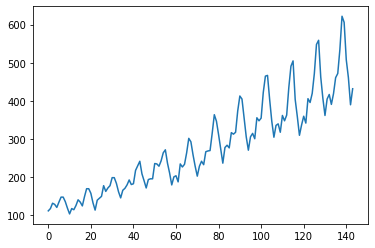

In [610]:
flights.passengers.plot()

In [611]:
flights.loc[np.random.randint(0, 144, 20),"passengers"] = None

In [612]:
flights.isnull().sum()

year           0
month          0
passengers    20
dtype: int64

<AxesSubplot:>

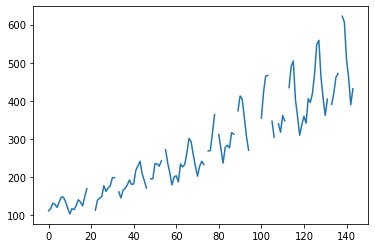

In [605]:
flights.passengers.plot()

<AxesSubplot:>

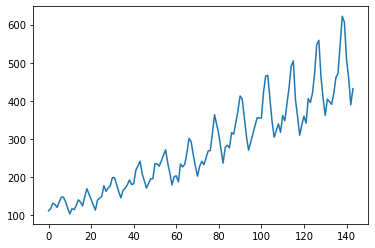

In [606]:
flights["passengers"].interpolate().plot(kind="line")

<AxesSubplot:>

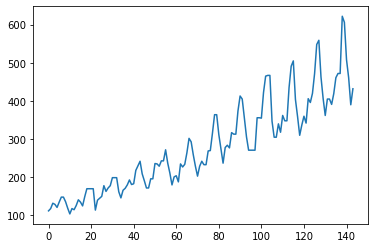

In [607]:
flights["passengers"].fillna(method = "ffill").plot(kind="line")

## Umgang mit Ausreißern

- Ausreißer sind ungewöhnliche Werte in Ihrem Datensatz und können statistische Analysen verzerren und ihre Annahmen verletzen. 
- Ausreißer erhöhen die Variabilität Ihrer Daten, was die statistische Aussagekraft verringert. Folglich kann das Ausschließen von Ausreißern dazu führen, dass Ihre Ergebnisse statistisch signifikant werden. 
- Ausreißer können einen unverhältnismäßigen Einfluss auf statistische Ergebnisse haben, wie z. B. den Mittelwert, was zu irreführenden Interpretationen führen kann. In diesem Fall lässt der Mittelwert den Eindruck erwecken, dass die Datenwerte höher sind, als sie tatsächlich sind.

### Ursachen für Ausreißer
- Fehler bei der Dateneingabe
- ErsteMessfehler oder Instrumentenfehler
- Stichprobenfehler
- Datenverarbeitungsfehler
- Natürliche Neuheiten in Daten

### Richtlinie zum Umgang mit Ausreißern

- Ein Messfehler oder Dateneingabefehler, korrigieren Sie den Fehler wenn möglich. Wenn Sie es nicht beheben können, entfernen Sie diese Beobachtung, weil Sie wissen, dass es falsch ist.
- Kein Teil der Population, die Sie untersuchen (d. h. ungewöhnliche Eigenschaften oder Bedingungen), Sie können den Ausreißer rechtmäßig entfernen.
- Einen natürlichen Teil der Bevölkerung, den Sie untersuchen, sollten Sie nicht entfernen.

## Fangen und Erkennen von Ausreißern

In [608]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Grafiken

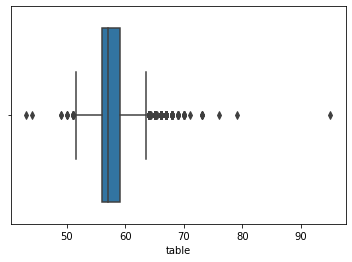

In [611]:
# Sie müssen nicht wissen, wie dieses Plotten passiert.
# Konzentrieren sich nur auf Quartale.
# Erinneren sich an die Statistikstunde IQR.
sns.boxplot(x=df.table);

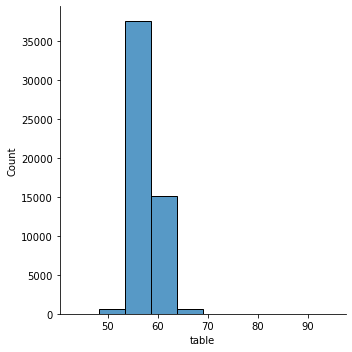

In [612]:
sns.displot(df.table, bins=10, kde=False)

In [613]:
df["table"]

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

### Tukey's Fences | Tukey's Rule

- Die erste Möglichkeit, Q1 und Q3 anzugeben, ist die Verwendung der Methode ``.quantile()``

In [614]:
Q1 = df["table"].quantile(0.25)
Q3 = df["table"].quantile(0.75)
IQR = Q3-Q1

In [615]:
Q1

56.0

In [616]:
Q3

59.0

In [617]:
IQR

3.0

- Die zweite Möglichkeit, Q1 und Q3 anzugeben, ist die Verwendung der Methode .describe()

In [618]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [620]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [621]:
lower_lim

51.5

In [622]:
upper_lim

63.5

In [623]:
(df.table < lower_lim).value_counts()

False    53924
True        16
Name: table, dtype: int64

In [624]:
(df.table > upper_lim).value_counts()

False    53351
True       589
Name: table, dtype: int64

In [625]:
df.table[(df.table < lower_lim) | (df.table > upper_lim)].count()

605

In [626]:
df.table[~((df.table < lower_lim) | (df.table > upper_lim))].count()

53335

In [627]:
df.table[(df.table >= lower_lim) & (df.table <= upper_lim)].count()

53335

## Entfernen der Ausreißer

In [628]:
not_outliers = (df.table >= lower_lim) & (df.table <= upper_lim)

In [629]:
df.table[not_outliers].count()

53335

In [630]:
len(df[not_outliers])

53335

In [631]:
cleaned_df = df[not_outliers]

In [632]:
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [633]:
 df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [634]:
outlier_index = df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index

In [635]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


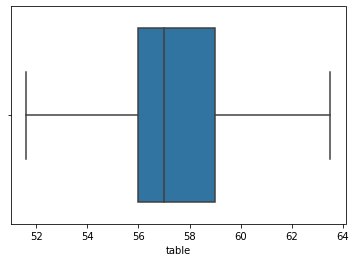

In [637]:
sns.boxplot(x = cleaned_df.table);

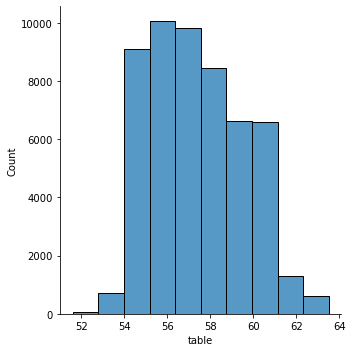

In [638]:
sns.displot(cleaned_df.table, bins = 10, kde = False)

In [639]:
cleaned_df.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [640]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

## Begrenzung und Transformation der Ausreißer

### Einschränkung mit der Methode ``.winsorize()``

In [641]:
from scipy.stats.mstats import winsorize

In [642]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [643]:
winsorize(df.table, (0.02, 0.05))

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [644]:
a = len(df.table[df.table<lower_lim])/len(df)
a

0.00029662588060808305

In [645]:
b = len(df.table[df.table>upper_lim])/len(df.table)
b

0.010919540229885057

In [646]:
table_win = winsorize(df.table, (a, b))

<AxesSubplot:>

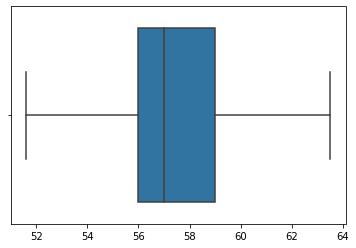

In [647]:
sns.boxplot(x = table_win)

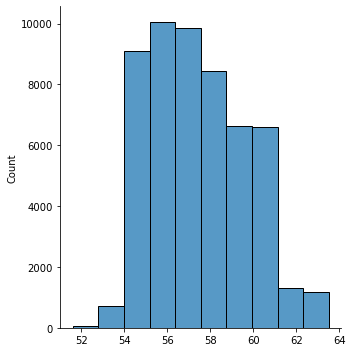

In [648]:
sns.displot(table_win, bins = 10, kde =False)

In [651]:
df_table_win = pd.Series(table_win)

In [650]:
df_table_win.describe()

count    53940.000000
mean        57.438591
std          2.161059
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
dtype: float64

In [652]:
upper_lim, lower_lim

(63.5, 51.5)

In [653]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [654]:
df.table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [655]:
df_table_win.sort_values().head(20)

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

In [656]:
df_table_win[df_table_win == 51.6].size

17

In [657]:
df_table_win[df_table_win == 63.5].size

590

### ``log()`` Transformation

In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.3 MB


In [659]:
df["carat"]

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

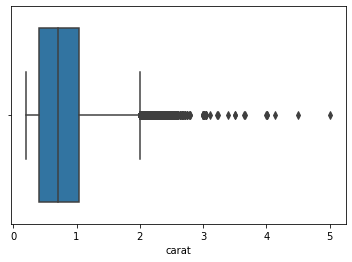

In [661]:
sns.boxplot(x = df.carat);

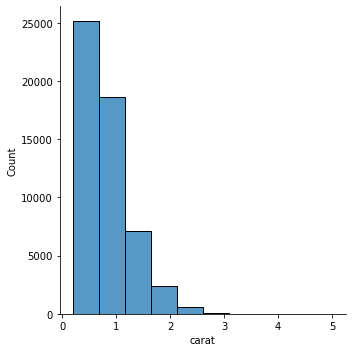

In [662]:
sns.displot(df.carat, bins = 10, kde = False)

In [663]:
np.log(df.carat)

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

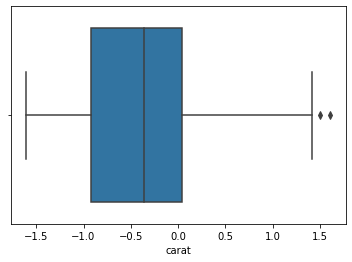

In [665]:
sns.boxplot(x = np.log(df.carat));

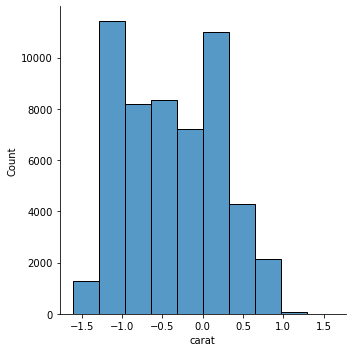

In [667]:
sns.displot(np.log(df.carat),  bins = 10, kde = False);

In [669]:
df["carat_log"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


### Entfernen nach der Log-Transformation

In [670]:
Q1 = df.carat_log.quantile(0.25)
Q3 = df.carat_log.quantile(0.75)
IQR = Q3-Q1

In [671]:
Q1

-0.916290731874155

In [672]:
Q3

0.03922071315328133

In [673]:
IQR

0.9555114450274363

In [674]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [675]:
lower_lim

-2.3495578994153097

In [676]:
upper_lim

1.472487880694436

In [677]:
(df.carat_log < lower_lim).value_counts()

False    53940
Name: carat_log, dtype: int64

In [678]:
(df.carat_log > upper_lim).value_counts()

False    53938
True         2
Name: carat_log, dtype: int64

In [679]:
(df.carat_log <= upper_lim).value_counts()

True     53938
False        2
Name: carat_log, dtype: int64

In [680]:
df.loc[(df.carat_log > upper_lim)]

,carat,depth,table,price,x,y,z,carat_log
27415,5.01,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,4.50,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [681]:
outlier_index = df.loc[(df.carat_log > upper_lim)].index
outlier_index

Int64Index([27415, 27630], dtype='int64')

In [682]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [683]:
not_outliers = (df.carat_log <= upper_lim)

In [684]:
len(df[not_outliers])

53938

In [685]:
cleaned_df = df[not_outliers]

In [686]:
cleaned_df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823
